In [2]:
# 导入包
import plotly.express as px
import numpy as np
import pandas as pd
import datetime
import random
import plotly.offline as py  #设置离线画图
import plotly.io as pio
import plotly.graph_objects as go
# 韦恩图
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [5]:
#比较
data=[
    ["主机关联(本方法)","TN",1050],
    ["主机关联(本方法)","TP",8083],
    ["主机关联(本方法)","FN",11],
    ["主机关联(本方法)","FP",30],
    ["主机关联(本方法)","未知",407],
    ["地址关联","TN",961],
    ["地址关联","TP",6901],
    ["地址关联","FN",1607],
    ["地址关联","FP",112],
    ["地址关联","未知",0],
    ["地址字符串相似性","TN",971],
    ["地址字符串相似性","TP",5822],
    ["地址字符串相似性","FN",2788],
    ["地址字符串相似性","FP",0],
    ["地址字符串相似性","未知",0]]
d=pd.DataFrame(data,columns=["方法","指标","数量"])
fig=px.bar(d,x="方法",color="指标",y="数量",barmode="stack",template="plotly_white",pattern_shape="指标",pattern_shape_sequence=['.','+','x','\\'])
fig.update_traces(marker=dict(pattern_fillmode="replace",line_color="black",line_width=1.5))
fig.update_layout(font_size=14)
fig.write_image("./compare.pdf")
fig.show()

# 关联簇占比

In [60]:
def drawcluster(save=False):
    total=9581
    one_N=874
    one=7013
    data=[]
    for _ in range(one):
        data.append(["1-1","1-1",1])
    percent=int(one_N*random.uniform(0.6,0.7))
    for _ in range(percent):
        num=int(random.gauss(0,5))
        if num>-1:
            data.append(["1-N","1-2",1])
        else:
            data.append(["1-N","2-1",1])
    for _ in range(one_N-percent):
        num=int(random.gauss(0,10))
        if num>3:
            data.append(["1-N","1-"+("3" if num<0 else str(3+num)),1])
        else:
            data.append(["1-N",("3" if num<0 else str(3+num))+"-1",1])
    for _ in range(total-one_N-one):
        num1=int(random.gauss(-2,5))
        m=num1 if num1>2 else 2
        num2=int(random.gauss(-2,5))
        n=num2 if num2>2 else 2
        data.append(["M-N",str(m)+"-"+str(n),1])         
    datafra=pd.DataFrame(data,columns=["类型","详细类型","数量"])
    pie=px.sunburst(datafra,values="数量",path=["类型", "详细类型"],branchvalues="total")
    pie.update_traces(
        textinfo="label+percent parent",
    )
    pie.update_layout(font_size=14)
    if save:
        pie.write_image("images/cluster.pdf")
    pie.show()
drawcluster(True)

# 水印效果比较

In [11]:
# 水印效果数据
def watermark_fig(save=False):
    begin = datetime.date(2023,12,6)
    end = datetime.date(2023,12,20)
    datelist=[]
    mydata=[]
    olddata=[]
    for i in range((end - begin).days+1):
        day = begin + datetime.timedelta(days=i)
        datelist.append(day.strftime("%Y年%m月%d日"))
        mydata.append([200+int(i*random.choice([204,208,201,206]))+random.randint(-50, 50),"动态域名水印(本方法)"])
        olddata.append([100+int(i*random.choice([107,103,106,102]))+random.randint(-20,20),"静态域名水印"])
    data=[]
    for i in range(len(datelist)):
        data.append([datelist[i],mydata[i][0],mydata[i][1]])
        data.append([datelist[i],olddata[i][0],olddata[i][1]])
    # 数据
    df=pd.DataFrame(data,columns=["日期","IPv6 DNS服务发现数量","水印类型"])
    # 绘图
    fig = px.line(df, x="日期", y="IPv6 DNS服务发现数量",markers=True,symbol="水印类型",line_dash="水印类型",color="水印类型",template="plotly_white")
    fig.update_yaxes(
        zeroline=True,
        linecolor='black',
        showline=True,
        automargin=True
    )
    fig.update_xaxes(
        tickangle=45,
        linecolor='black',
        showline=True,
        automargin=True
    )
    fig.update_layout(
            title=None,
            # font_size=14,
            legend=dict(
            # font_size=14,    
            x=1.02,
            y=1,
            title_font_family="Times New Roman",
            bordercolor="Black",
            borderwidth=2
        )
    )
    if save:
        fig.write_image("images/水印比较.pdf")
    fig.show()
watermark_fig(True)

In [12]:
from plotly.subplots import make_subplots 
blue=px.colors.qualitative.Plotly[0]

fig = make_subplots(rows=1, cols=3)
data=[
    ["IPv6地址数/请求","动态域名水印(本方法)",3.937,"IPv6地址数/请求"],
    ["IPv6地址数/请求","静态域名水印",1.471,"IPv6地址数/请求"],
    ["IPv6地址块/请求","动态域名水印(本方法)",1.386,"IPv6地址块/请求"],
    ["IPv6地址块/请求","静态域名水印",1.105,"IPv6地址块/请求"],
    ["水印部分平均长度","动态域名水印(本方法)",18.482,"水印部分平均长度"],
    ["水印部分平均长度","静态域名水印",61.923,"水印部分平均长度"],]
d=pd.DataFrame(data,columns=["比较指标","方法","比值","指标"])
fig.add_trace(go.Bar(name="动态域名水印(本方法)",x=["IPv6地址数/请求"], y=[3.937],text="3.937"),
    row=1, col=1
)
fig.add_trace(go.Bar(name="静态域名水印",x=["IPv6地址数/请求"], y=[1.471],text="1.471",marker_pattern_shape="/",marker_color=blue,textposition='outside'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(name="动态域名水印(本方法)",x=["IPv6地址块/请求"], y=[1.386],text="1.386",marker_color=blue,showlegend=False,textposition='outside'),
    row=1, col=2
)
fig.add_trace(go.Bar(name="静态域名水印",x=["IPv6地址块/请求"], y=[1.105],text="1.105",marker_pattern_shape="/",marker_color=blue,showlegend=False,textposition='outside'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(name="动态域名水印(本方法)",x=["水印部分平均长度"], y=[18.482],text="18.482",marker_color=blue,showlegend=False,textposition='outside'),
    row=1, col=3
)
fig.add_trace(go.Bar(name="静态域名水印",x=["水印部分平均长度"], y=[61.923],text="61.923",marker_pattern_shape="/",marker_color=blue,showlegend=False,textposition='outside'),
    row=1, col=3
)
# fig=px.bar(d,text_auto=True,facet_col="指标",facet_col_spacing=0.1,x="比较指标",y="比值",barmode="group",template="plotly_white",pattern_shape="方法")
fig.update_traces(textposition="outside",marker=dict(pattern_fillmode="replace",line_color="black",line_width=1.5))
fig["layout"]["yaxis"].update({"range":[0,4.5],"title":"比值"})
fig["layout"]["yaxis2"].update({"range":[0,1.55]})
fig["layout"]["yaxis3"].update({"range":[0,67]})
fig.update_layout(
    font_size=12,
            template="plotly_white",
            legend=dict(
            font_size=14,    
            x=1.02,
            y=1,
            title_font_family="Times New Roman",
            bordercolor="Black",
            borderwidth=2))
fig.write_image("./waterperquery_compare.pdf")
fig.show()

In [10]:
# 挖掘效果
def wmlink_fig(save=False):
    import plotly.graph_objects as go
    # 1~10 CNAME链的数量
    # olddata 有4000，mydata有6000
    old=[1500,1000,100,900,0,0,0,0,0,0]
    olddata=[]
    i=1
    for o in [x+random.randint(-100,100) for x in old[:4]]+old[4:]:
        olddata=olddata+[i]*o
        i+=1
        
    my=[2000,1000,110,110,110,110,110,110,110,1000]
    mydata=[]
    i=1
    for m in [x+random.randint(-100,100) for x in my]:
        mydata=mydata+[i]*m
        i+=1
    data=[]
    for i in range(len(mydata)):
        data.append([mydata[i],"动态域名水印(本方法)"])
    for i in range(len(olddata)):
        data.append([olddata[i],"静态域名水印"])
    
    df=pd.DataFrame(data,columns=["CNAME链长度","水印类型"])
    # fig=px.histogram(df,x="CNAME链长度",color="水印类型",barmode='group',text_auto=True)
    fig=px.ecdf(df,x="CNAME链长度",color="水印类型",line_dash="水印类型",ecdfnorm=None)
    fig.update_layout(
        template="plotly_white",
        yaxis_title_text='CNAME链数量',
        legend=dict(
        x=1.02,
        y=1,
        title_font_family="Times New Roman",
        bordercolor="Black",
        borderwidth=2)
    )
    fig.update_xaxes(
        zeroline=True,
        linecolor='black',
        showline=True,
        automargin=True,
        range=[0.5,11]
    )
    fig.update_yaxes(
        zeroline=True,
        linecolor='black',
        showline=True,
        automargin=True
    )
    if save:
        fig.write_image("images/CNAMElink.pdf")
    fig.show()
    
    
    # 聚类簇大小分布
    # olddata有1383个簇，mydata有972个簇
    olddata=[2 for _ in range(201)]
    olddata+=[4 for _ in range(283)]
    olddata+=[random.randint(3,4) for _ in range(582)]
    olddata+=[random.randint(5,10) for _ in range(100)]
    mydata=[2 for _ in range(246)]
    mydata+=[3 for _ in range(132)]
    mydata+=[random.randint(2,4)+random.randint(2,4) for _ in range(500)]
    mydata+=[random.randint(4,10)+random.randint(5,10) for _ in range(100)]
    data=[]
    for i in range(len(mydata)):
        data.append([mydata[i],"动态域名水印(本方法)"])
    for i in range(len(olddata)):
        data.append([olddata[i],"静态域名水印"])
    
    df=pd.DataFrame(data,columns=["关联簇大小","水印类型"])
    # fig=px.histogram(df,x="关联簇大小",color="水印类型",barmode="group",text_auto=True)
    fig=px.ecdf(df,x="关联簇大小",color="水印类型",line_dash="水印类型",ecdfnorm=None)
    fig.update_layout(
        template="plotly_white",
        yaxis_title_text='关联簇数量',
        legend=dict(
        x=1.02,
        y=1,
        title_font_family="Times New Roman",
        bordercolor="Black",
        borderwidth=2)
    )
    fig.update_xaxes(
        zeroline=True,
        linecolor='black',
        showline=True,
        automargin=True,
        range=[0.5,21]
    )
    fig.update_yaxes(
        zeroline=True,
        linecolor='black',
        showline=True,
        automargin=True
    )
    if save:
        fig.write_image("images/comdist.pdf")
    fig.show()
    
wmlink_fig(True)

# ASN分布

In [13]:
# top ASN
def asn_draw(save=False):
    from analyzer import node
    data = []
    inputdata="./recurisivev6dns.txt"
    print(len(open(inputdata).readlines()))
    # exclist=["中国台湾","中国香港"]
    with open(inputdata, "r") as f:
        while True:
            l = f.readline()
            if l == "":
                break
            ip6 = l.splitlines()[0]
            n = node(ip6)
            if n.AS=="ASNUnKnown":
                continue
            data.append({"ip": n.ip,
                        "owner": n.owner,
                        "isp": n.isp,
                        "area": n.prov,
                        "asn": n.AS+"("+n.isp+")",
                        "lat": n.lat,
                        "lng": n.lng,
                        "coucode":n.couCode,
                        "cou":n.cou})
    d = pd.DataFrame(data)
    print(d.shape[0])
    # 重命名
    d=d.rename(columns={'asn':"自治域"})

    # top10 柱状图
    cc = d['自治域'].value_counts()[:10]
    cc=cc.rename("IPv6 DNS数量",inplace=True)

    bar_chart = px.bar(cc,y="IPv6 DNS数量",template="plotly_white",text="IPv6 DNS数量")
    bar_chart.update_traces(textposition="outside",marker=dict(pattern_fillmode="replace",line_color="black",line_width=1.5))
    bar_chart.update_layout(
        font_size=16,
        showlegend=False,
    )
    bar_chart.update_yaxes(
        range=[0,3000],
        showline=True,
        zeroline=True,
        automargin=True
    )
    if save:
        bar_chart.write_image("images/top10自治域.pdf")
    bar_chart.show()

    # 分布
    cc = d['自治域'].value_counts()
    cc=cc.rename("IPv6 DNS数量",inplace=True)
    # his_chart=px.histogram(cc,x="IPv6 DNS数量",nbins=40,marginal="violin",template="plotly_white",text_auto=True)
    # his_chart.update_layout(
    #     yaxis_title_text='自治域数量',
    # )
    # if save:
    #     his_chart.write_image("images/自治域分布.pdf")
    # his_chart.show()
    cdf=px.ecdf(cc,x="IPv6 DNS数量",log_x=True,template="plotly_white",ecdfnorm=None)
    cdf.update_layout(
        font_size=16,
        yaxis_title_text='自治域数量',
    )
    cdf.update_xaxes(
        zeroline=True,
        linecolor='black',
        showline=True,
        automargin=True,
        range=[-0.2,3.6]
    )
    cdf.update_yaxes(
        zeroline=True,
        linecolor='black',
        showline=True,
        automargin=True
    )
    if save:
        cdf.write_image("images/自治域分布.pdf")
    cdf.show()
asn_draw(True)

22300
20541


# ISP分布

In [11]:
def isp_draw(save=False):
    from analyzer import node
    data = []
    inputdata="./recurisivev6dns.txt"
    print(len(open(inputdata).readlines()))
    # exclist=["中国台湾","中国香港"]
    with open(inputdata, "r") as f:
        while True:
            l = f.readline()
            if l == "":
                break
            ip6 = l.splitlines()[0]
            n = node(ip6)
            if n.isp=="UnKnown":
                continue
            data.append({"ip": n.ip,
                        "owner": n.owner,
                        "isp": n.isp,
                        "area": n.prov,
                        "asn": n.AS,
                        "lat": n.lat,
                        "lng": n.lng,
                        "coucode":n.couCode,
                        "cou":n.cou})
    d = pd.DataFrame(data)
    print(d.shape[0])
    # 重命名
    d=d.rename(columns={'isp':"运营商"})

    # top10 柱状图
    cc = d['运营商'].value_counts()[:10]
    cc=cc.rename("IPv6 DNS数量",inplace=True)

    bar_chart = px.bar(cc,y="IPv6 DNS数量",text="IPv6 DNS数量",text_auto=True,template="plotly_white")
    bar_chart.update_traces(
        textposition="outside",
        marker=dict(
            pattern_fillmode="replace",
            line_color="black",
            line_width=1.5))
    bar_chart.update_layout(
        autosize=True,
        font_size=18,
        showlegend=False,
    )
    bar_chart.update_yaxes(
        range=[0,3000],
        zeroline=True,
        showline=True,
        automargin=True
    )
    if save:
        bar_chart.write_image("images/top10运营商.pdf")
    bar_chart.show()

    # 分布
    cc=d['运营商'].value_counts()
    cc2 = d['运营商'].value_counts(ascending=True)[:2202].rename("IPv6 DNS数量",inplace=True)
    cc=cc.rename("IPv6 DNS数量",inplace=True)
    # his_chart=px.histogram(cc,x="IPv6 DNS数量",marginal="violin",nbins=40,template="plotly_white",text_auto=True)
    his_chart=px.ecdf(cc,x="IPv6 DNS数量",log_x=True,ecdfnorm=None,template="plotly_white")
    his_chart.update_layout(
        font_size=18,
        yaxis_title_text='运营商数量',
    )
    his_chart.update_xaxes(
        zeroline=True,
        linecolor='black',
        showline=True,
        automargin=True,
        range=[-0.2,3.6]
    )
    his_chart.update_yaxes(
        
        zeroline=True,
        linecolor='black',
        showline=True,
        automargin=True
    )
    if save:
        his_chart.write_image("images/运营商整体分布.pdf")
    his_chart.show()
    
    # his_chart2=px.histogram(cc2,x="IPv6 DNS数量",marginal="violin",nbins=20,template="plotly_white",text_auto=True)
    # his_chart2=px.ecdf(cc2,x="IPv6 DNS数量",ecdfnorm=None)
    # his_chart2.update_layout(
    #     yaxis_title_text='运营商数量',
    # )
    # if save:
    #     his_chart2.write_image("images/运营商分布[1~100].pdf")
    # his_chart2.show()
isp_draw(True)

22300
20536


# 国家

In [9]:
from analyzer import node
import pycountry
D={"Turkey":"TUR",
   "Great Britain (UK)":"GBR",
   "Macedonia (FYROM)":"MKD",
   "Mexico":"MEX",
   "Guatemala":"GTM",
   "China":"CHN",
   "United States":"USA",
   "Isle of Man, British Dependency":"IMN",
   "Cote D'Ivoire (Ivory Coast)":"CIV",
   "East Timor":"TLS",
   "United States Virgin Islands":"USA",
   "Curaao":"USA",
   "Congo, Democratic Republic":"COD"}
def get_cc(ccname):
    if ccname in D.keys():
        return D[ccname]
    print(ccname)
    #根据指定的国家，返回Pygal使用的两个字母的国别码
    ccode=pycountry.countries.search_fuzzy(ccname)[0].alpha_3
    return ccode


In [10]:

data = []
# inputdata="./recurisivev6dns.txt"
# inputdata="./openIPv6dns.txt"
inputdata="./53openIPv6.txt"
print(len(open(inputdata).readlines()))
i=0
with open(inputdata, "r") as f:
    while True:
        l = f.readline()
        if l == "":
            break
        ip6 = l.splitlines()[0]
        n = node(ip6,lang="en")
        if n.cou=="UnKnown":
            continue
        data.append({"ip": n.ip,
                    "owner": n.owner,
                    "isp": n.isp,
                    "area": n.prov,
                    "asn": n.AS,
                    "lat": n.lat,
                    "lng": n.lng,
                    "coucode":get_cc(n.cou),
                    "cou":n.cou})
        i+=1
df = pd.DataFrame(data)
df

273633
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil

KeyboardInterrupt: 

In [4]:
import plotly.graph_objects as go
ccount=df['coucode'].value_counts()
ccount
ccdata={'cou':ccount.index,"count":ccount.values}
ccframe=pd.DataFrame(ccdata)
fig = go.Figure(data=go.Choropleth(
    locations = ccframe['cou'],
    z = ccframe['count'],
    # colorscale = "GnBu",
    colorscale="OrRd",
    autocolorscale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar=dict(
    title = 'IPv6 DNS数量',
    ticks="outside")
))

fig.write_image("./openipv6dns.pdf")

fig.show()

In [21]:
# 双栈
# from upsetplot import generate_counts

data=[
    ["指标1",int(9035*0.54)+14],
    ["指标2",int(9035*0.66)-14],
    ["指标3",int(9035*0.08)+9],
    ["指标4",int(9035*0.14)-24],
    ["指标5",int(9035*0.04)+21],
    ["指标6",int(9035*0.10)-4],
    ["指标7",1298],
    ["指标8",int(9035*0.05)+27],
    ["指标9",int(9035*0.09)+12],
    ["指标10",int(9035*0.17)+31]
    ]
d=pd.DataFrame(data,columns=["指标","DNS服务数量"])
fig=px.bar(d,x="指标",y="DNS服务数量",text="DNS服务数量",template="plotly_white")
fig.update_layout(font_size=14,xaxis={'categoryorder':'total descending'})
fig.update_traces(
    textposition='outside',
    marker=dict(
        pattern_fillmode="replace",
        line_color="black",
        line_width=1.5))
fig.write_image("./zhibiao.pdf")
fig.show()


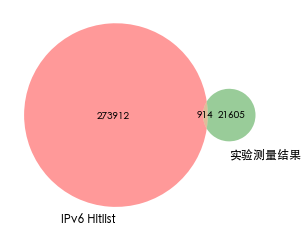

In [13]:
# 数据差异
def vsv6hitlist(save=False):
    plt.rcParams['font.sans-serif']= ['Heiti TC'] # 中文支持
    midd=914
    venn2(subsets = (273912, 22519-midd, midd), set_labels = ('IPv6 Hitlist', '实验测量结果'))
    plt.rcParams.update({'font.size': 9})
    if save:
        plt.savefig("./venn.pdf")
    plt.show()
vsv6hitlist(save=True)

In [22]:
data="./pagerank.csv"
df=pd.read_csv(data)
fig=px.ecdf(df,x="score",log_x=True,template="plotly_white")
fig.update_layout(
    font_size=14,
    yaxis_title_text='分布占比',
    xaxis_title_text='风险值D(A)'
)
fig.update_xaxes(
    zeroline=True,
    linecolor='black',
    showline=True,
    automargin=True,
)
fig.update_yaxes(
    zeroline=True,
    linecolor='black',
    showline=True,
    automargin=True
)
fig.write_image("./dist.pdf")
fig.show()

In [29]:
data=[
    ["谷歌",74],
    ["中国移动",21],
    ["Cloudflare",22],
    ["NeuStar",37],
    ["EdgeUno",29],
    ["阿里云",13],
    ["Facebook",28],
    ["OpenDNS",16],
    ["WoodyNet",24],
    ["亚太网络信息中心",2],
    ["YANDEX",33],
    ["T-Mobile",36],
    ["OVH云",42]]
df=pd.DataFrame(data,columns=["归属运营商","数量"])
fig=px.pie(df,names="归属运营商",values="数量")
fig.update_traces(textinfo='label+percent+value')
fig.update_layout(
        template="plotly_white",
        legend=dict(
        x=1.3,
        y=1)
    )
fig.write_image("./v4dns.pdf")
fig.show()

In [31]:
data=[
    ["D-Link",174],
    ["Linksys",141],
    ["Youhua Tech",229],
    ["中兴",137],
    ["FiberHome",129],
    ["中国联通",107],
    ["浪潮",103],
    ["T-Mobile",112],
    ["华为",1],
    ["华硕",2],
    ["联想",61],
    ["IBM",102]]
df=pd.DataFrame(data,columns=["设备制造商","数量"])
fig=px.pie(df,names="设备制造商",values="数量")
fig.update_traces(textinfo='label+percent+value')
fig.update_layout(
        template="plotly_white",
        legend=dict(
        x=1.3,
        y=1)
    )
fig.write_image("./device.pdf")
fig.show()

In [3]:
# from plotly.subplots import make_subplots 
# blue=px.colors.qualitative.Plotly[0]
import plotly.express as px

# fig = make_subplots(rows=1, cols=3)
data=[
    ["第一轮","香港权威",2397],
    ["第一轮","纽约权威",2351],
    ["第一轮","大阪权威",2279],
    ["第二轮","香港权威",2293],
    ["第二轮","纽约权威",2368],
    ["第二轮","大阪权威",2386],
    ["{第一轮∪第二轮}-{第一轮∩第二轮}","香港权威",1141],
    ["{第一轮∪第二轮}-{第一轮∩第二轮}","纽约权威",1107],
    ["{第一轮∪第二轮}-{第一轮∩第二轮}","大阪权威",1186],]
d=pd.DataFrame(data,columns=["数据来源","自建权威服务器","IPv6 DNS数量"])

fig=px.bar(d,text_auto=True,x="数据来源",y="IPv6 DNS数量",barmode="group",color="自建权威服务器",template="plotly_white",pattern_shape="自建权威服务器")
fig.update_traces(textposition="outside",marker=dict(pattern_fillmode="replace",line_color="black",line_width=1.5))
# fig["layout"]["yaxis"].update({"range":[0,4.5],"title":"比值"})
# fig["layout"]["yaxis2"].update({"range":[0,1.55]})
# fig["layout"]["yaxis3"].update({"range":[0,67]})
fig.update_layout(
    font_size=14,
            template="plotly_white",
            legend=dict(
            font_size=14,    
            x=1.02,
            y=1,
            title_font_family="Times New Roman",
            bordercolor="Black",
            borderwidth=2))
fig.write_image("./loc_compare.pdf")
fig.show()